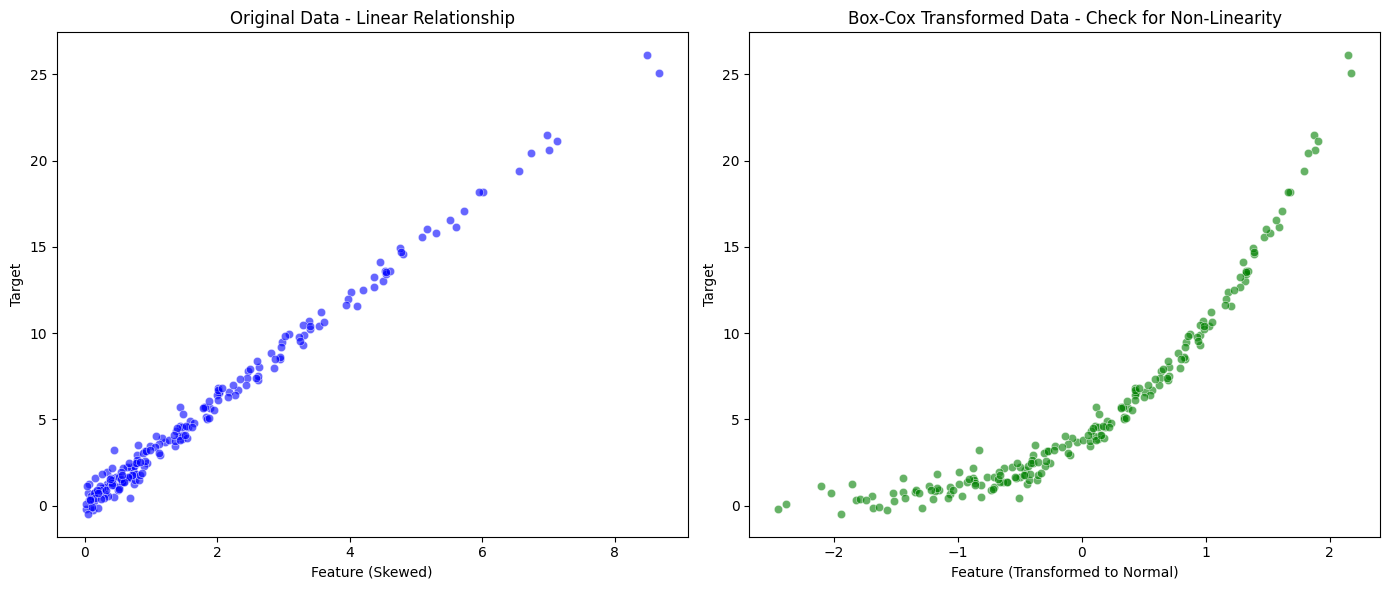

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

# 1. Generate left-skewed data with a linear relationship
np.random.seed(42)
size = 200
X = np.random.exponential(scale=2, size=(size, 1))
y = 3 * X.flatten() + np.random.normal(loc=0, scale=0.5, size=size)

# 2. Apply Box-Cox transformation to normalize the distribution
pt = PowerTransformer(method='box-cox', standardize=True)
X_transformed = pt.fit_transform(X)

# 3. Visualize the original linear relationship and transformed relationship
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
sns.scatterplot(x=X.flatten(), y=y, color='blue', alpha=0.6)
plt.title('Original Data - Linear Relationship')
plt.xlabel('Feature (Skewed)')
plt.ylabel('Target')

# Transformed data
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_transformed.flatten(), y=y, color='green', alpha=0.6)
plt.title('Box-Cox Transformed Data - Check for Non-Linearity')
plt.xlabel('Feature (Transformed to Normal)')
plt.ylabel('Target')

plt.tight_layout()
plt.show()


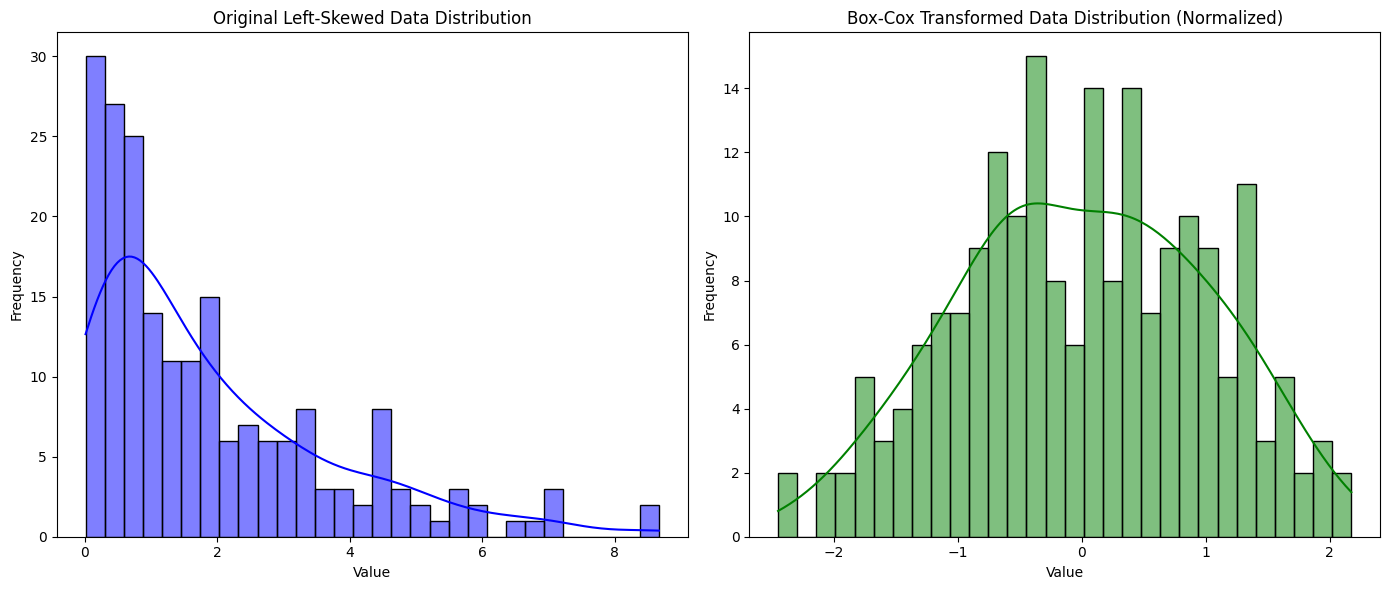

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

# 1. Generate left-skewed data
np.random.seed(42)
size = 200
X = np.random.exponential(scale=2, size=(size, 1))

# 2. Visualize the original skewed data distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(X.flatten(), kde=True, color='blue', bins=30)
plt.title('Original Left-Skewed Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 3. Apply Box-Cox transformation to normalize the distribution
pt = PowerTransformer(method='box-cox', standardize=True)
X_transformed = pt.fit_transform(X)

# 4. Visualize the transformed data distribution
plt.subplot(1, 2, 2)
sns.histplot(X_transformed.flatten(), kde=True, color='green', bins=30)
plt.title('Box-Cox Transformed Data Distribution (Normalized)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

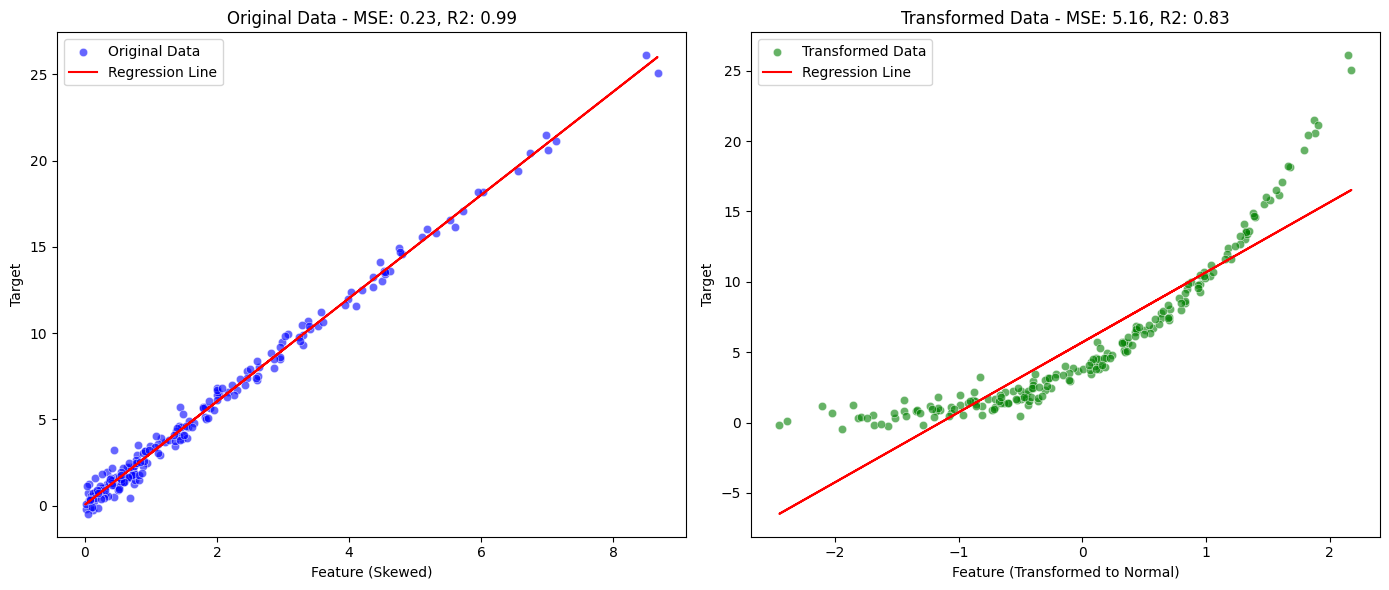

         Model       MSE  R2 Score
0     Original  0.233466  0.992196
1  Transformed  5.157388  0.827605


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

# 1. Generate left-skewed data
np.random.seed(42)
size = 200
X = np.random.exponential(scale=2, size=(size, 1))
y = 3 * X.flatten() + np.random.normal(loc=0, scale=0.5, size=size)

# 2. Apply linear regression to the original skewed data
model_original = LinearRegression()
model_original.fit(X, y)
y_pred_original = model_original.predict(X)

# 3. Apply Box-Cox transformation to normalize the distribution
pt = PowerTransformer(method='box-cox', standardize=True)
X_transformed = pt.fit_transform(X)

# 4. Apply linear regression to the transformed data
model_transformed = LinearRegression()
model_transformed.fit(X_transformed, y)
y_pred_transformed = model_transformed.predict(X_transformed)

# 5. Calculate performance metrics for both models
mse_original = mean_squared_error(y, y_pred_original)
r2_original = r2_score(y, y_pred_original)

mse_transformed = mean_squared_error(y, y_pred_transformed)
r2_transformed = r2_score(y, y_pred_transformed)

# 6. Plot the original and transformed regression lines
plt.figure(figsize=(14, 6))

# Original data and regression line
plt.subplot(1, 2, 1)
sns.scatterplot(x=X.flatten(), y=y, color='blue', alpha=0.6, label='Original Data')
plt.plot(X.flatten(), y_pred_original, color='red', label='Regression Line')
plt.title(f'Original Data - MSE: {mse_original:.2f}, R2: {r2_original:.2f}')
plt.xlabel('Feature (Skewed)')
plt.ylabel('Target')
plt.legend()

# Transformed data and regression line
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_transformed.flatten(), y=y, color='green', alpha=0.6, label='Transformed Data')
plt.plot(X_transformed.flatten(), y_pred_transformed, color='red', label='Regression Line')
plt.title(f'Transformed Data - MSE: {mse_transformed:.2f}, R2: {r2_transformed:.2f}')
plt.xlabel('Feature (Transformed to Normal)')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()

# Display performance metrics
metrics = pd.DataFrame({
    'Model': ['Original', 'Transformed'],
    'MSE': [mse_original, mse_transformed],
    'R2 Score': [r2_original, r2_transformed]
})

print(metrics)



### 비선형 -> 선형적으로 변환을 해서 성능을 개선할 수 있을까?
- 어떤 모델을 사용하는지도 정말 중요하다.
- 모델의 함수에 따라 피처에 대한 선택도 달라질 수 있다.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
import seaborn as sns


In [7]:
np.random.seed(42)
size = 200

X = np.random.uniform(1,10, size=(size,1))
y = np.exp(0.5 * X.flatten())+ np.random.normal(loc=0, scale=2, size=size)

In [18]:
model_original=LinearRegression()
model_original.fit(X,y)
y_pred_original = model_original.predict(X)


## 비선형을 -> 선형으로 변환하기 위해는 어떤 방법들이 있을까?
## log, 제곱근 등등 변환할 수 있는 방법

X_transformed = np.log(X)
y_transformed = np.log(y+1)

## 로그변환한 값을 출력

model_transformed=LinearRegression()
model_transformed.fit(X_transformed,y_transformed)
y_pred_transformed = model_transformed.predict(X_transformed)


In [24]:
## MSE 값 확인

mse_orginal = mean_squared_error(y,y_pred_original) # 비선형의 회귀분석 mse
r2_original = r2_score(y,y_pred_original)

mse_transformed=mean_squared_error(y_transformed,y_pred_transformed) # 로그변환의 회귀분석 mse
r2_transformed = r2_score(y_transformed,y_pred_transformed)

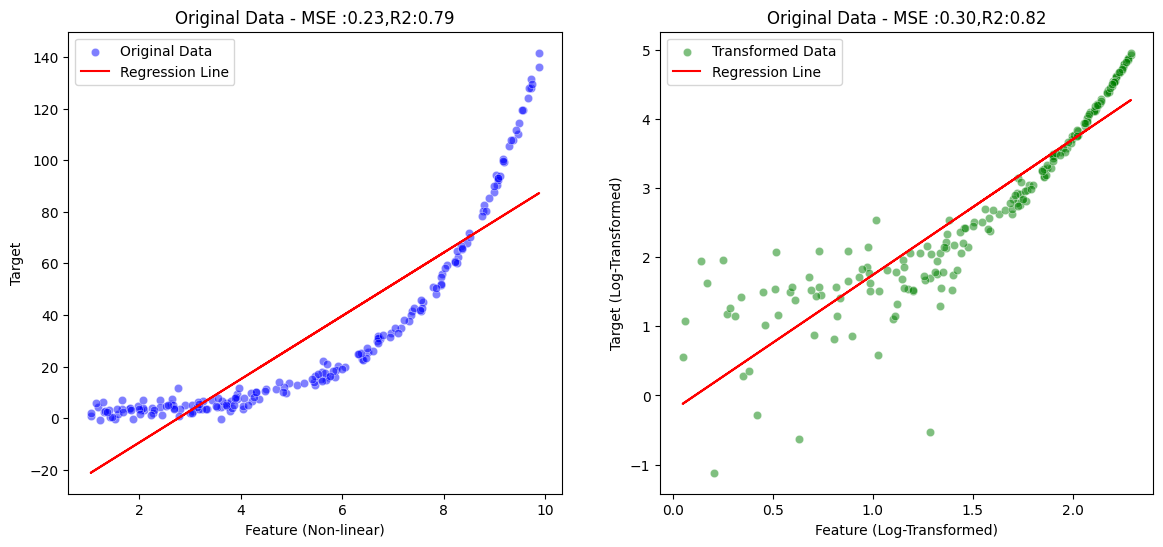

In [33]:
# 시각화를 통한 확인

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=X.flatten(), y=y, color = 'blue', alpha=0.5, label = 'Original Data')
plt.plot(X.flatten(),y_pred_original, color='red', label='Regression Line')
plt.title(f'Original Data - MSE :{mse_original:.2f},R2:{r2_original:.2f}')
plt.xlabel('Feature (Non-linear)')
plt.ylabel('Target')
plt.legend()


plt.subplot(1,2,2)
sns.scatterplot(x=X_transformed.flatten(), y=y_transformed, color = 'green', alpha=0.5, label = 'Transformed Data')
plt.plot(X_transformed,y_pred_transformed, color='red', label='Regression Line')
plt.title(f'Original Data - MSE :{mse_transformed:.2f},R2:{r2_transformed:.2f}')
plt.xlabel('Feature (Log-Transformed)')
plt.ylabel('Target (Log-Transformed)')
plt.legend()

### Feature_Selection 방법론
- 다중공선성 A,B 가 높다라고 하면 어떤 피처를 삭제하는 게 맞을까?
    - A,B 중에서? A,B 둘은 서로 관계가 있는 것인데?
    - A를 삭제해 보고, B도 삭제해 보고 경우의 수를 따져서 확인한다?
    - A,B중 어떤 걸 삭제해도 성능은 개선될 수 있다.
    - 어떤 피처를 삭제해야 할지는? 도메인과 다른 피처들의 관계 ->y 값의 관계들이 중요하다. 
    - 수치적인 것외에 기타 도메인 + y값들의 관계, 다른 피처들 관계들을 모두 다 고려해야 한다.